<a href="https://colab.research.google.com/github/Wenhao-umu/Practical_RL/blob/master/Q_learning_practise_1211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install piglet

     |████████████████████████████████| 67 kB 2.4 MB/s 


In [10]:
# install required system dependencies
!apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,981 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 994 kB in 2s (473 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:1.

In [11]:
# !apt-get install -y xvfb python-opengl > /dev/null 2>&1
# !pip install gym pyvirtualdisplay > /dev/null 2>&1
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=False,
                    size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [12]:
import gym 
from gym.wrappers import Monitor
import numpy as np
import matplotlib.pyplot as plt
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [13]:
import gym
from gym import spaces

import numpy as np
import random
from random import randint

import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

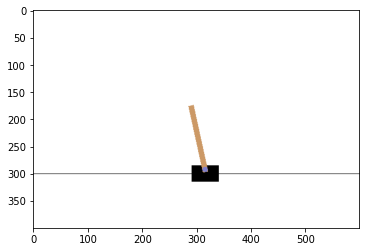

In [14]:
env_name = "CartPole-v1"
# env_name = "MountainCar-v0"
# env_name = "Pendulum-v0"


env = gym.make(env_name)

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  # action = 1 #ctrl+/
  print("The selected action is: ",action)
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [20]:
class Agent:

  def __init__(
    self, lr: float, gamma: float, act_space: spaces.Discrete,
    obs_space: spaces.Discrete, num_episodes: int, obs_space_len, action_space_len
   ):

    self.lr = lr  #learning rate
    self.gamma = gamma
    self.act_space = act_space
    self.obs_space = obs_space
    self.obs_space_len = obs_space_len
    self.action_space_len = action_space_len
    self.num_episodes = num_episodes
    self.eps: Array = np.exp(-5*np.linspace(0, 1, num_episodes))
    self.qtable = np.random.uniform(low=-2, high=0, size=(self.obs_space_len+[self.action_space_len])) #why size in this expression

  def act(self, o: int, episode_i: int) -> int:
    if random.uniform(1.0, 0.0) < self.eps[episode_i]:
      return self.act_space.sample() 
    
    return np.argmax(self.qtable[o])
    
  def update(self, o: int, a: int, r: float, o_prime: int) -> float:
    old_o_a_value = self.qtable[o][a]
    q_prime = np.max(self.qtable[o_prime])

    td_target = r + self.gamma * q_prime
    self.qtable[o][a] += self.lr * (td_target - old_o_a_value)

    return self.qtable[o][a] - old_o_a_value








In [21]:
def get_discrete_state(state, obs_space_len, bins):
  stateIndex = []
  for i in range(obs_space_len):
    stateIndex.append(np.digitize(state[i], bins[i]) - 1) 
  return tuple(stateIndex)

In [22]:
agent = Agent(lr=0.1, gamma=0.95, act_space=env.action_space, 
              obs_space=env.observation_space, num_episodes=10000,
              obs_space_len=[20], action_space_len=2)
print(agent.qtable.shape)


(20, 2)


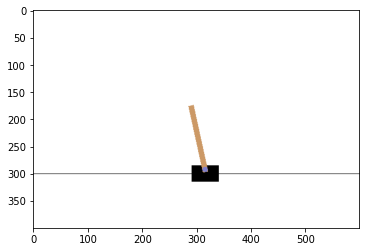

In [26]:
import pdb
random.seed(1234)
DISPLAY_EVERY = 100
if "CartPole" in env_name:
   num_bins = 20
   bins = [
           np.linspace(-4.8, 4.8, num_bins),
           np.linspace(-4, 4, num_bins),
           np.linspace(-.418, .418, num_bins),
           np.linspace(-4, 4, num_bins),
   ]
lr = 0.1
gamma = 0.95
num_episodes = 10000
if "CartPole" in env_name:
  obs_space_len = [num_bins+1] * len(env.observation_space.high)
  action_space_len = env.action_space.n
  agent = Agent(
      lr=lr, gamma=gamma, act_space=env.action_space, obs_space=env.observation_space,
      num_episodes=num_episodes, obs_space_len=obs_space_len, action_space_len=action_space_len
  )
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
else:
  obs_space_len = [env.horizon+1]
  action_space_len = 2
  agent = Agent(
      lr=lr, gamma=gamma, act_space=env.action_space, obs_space=env.observation_space,
      num_episodes=num.episodes, obs_space_len=obs_space_len, action_space_len=action_space_len
  )

show_verbose = False
# render_gym = False
render_gym = True
running_len = 5
running_delta = []
running_acc = []

for episode_i in range(num_episodes):
  step_counter = 1
  done = False
  if show_verbose:
    print('starting episode {episode_i}...'.format(episode_i=episode_i))
  delta_update = []
  n_successes: int = 0
  cumul_r: float = 0.0

  o = env.reset()

  if 'CartPole' in env_name:
    o = get_discrete_state(o, obs_space_len=len(env.observation_space.high), bins=bins)
  while not done:
    a = agent.act(o = o, episode_i= episode_i)

    o_prime, r, done, _ = env.step(action=a)

    if "CartPole" in env_name:
      o_prime = get_discrete_state(o_prime, len(env.observation_space.high), bins=bins)

    delta_update.append(agent.update(o=o, a=a, r=r, o_prime=o_prime))

    o = o_prime

    cumul_r += r
    n_successes += int(r>0.0)



